In [2]:
import pandas as pd
df = pd.read_csv("/content/housePrice.csv.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Apply one-hot encoding to the binary categorical columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)

# Display the first few rows to see the changes
display(df.head())

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,True,True,True,False,True,False


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [7]:
y_pred = model.predict(X_test)

In [9]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1771751116594.0347
R-squared (R2) Score: 0.6494754192267804


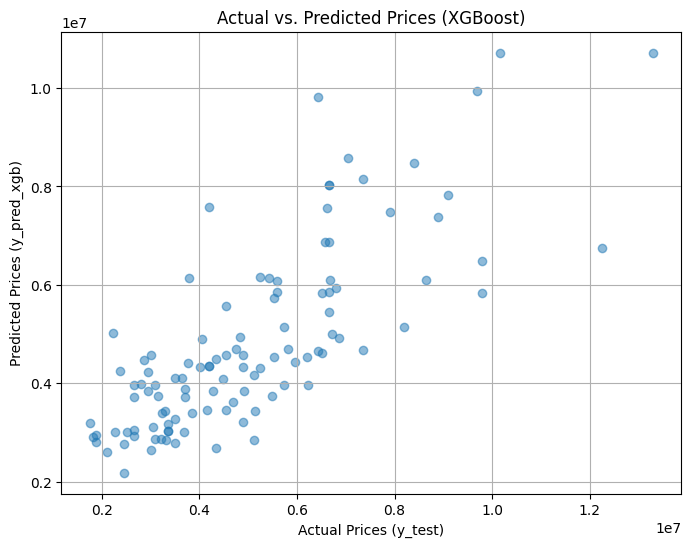

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred_xgb)")
plt.title("Actual vs. Predicted Prices (XGBoost)")
plt.grid(True)
plt.show()

In [11]:
!pip install xgboost

In [12]:
from xgboost import XGBRegressor

In [13]:
# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42) # Added random_state for reproducibility

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully!")

XGBoost Regressor model trained successfully!


In [15]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [18]:
mse_xgb = mean_squared_error(y_test , y_pred_xgb)
r2_xgb = r2_score(y_test , y_pred_xgb)
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2) Score: {r2_xgb}")

XGBoost Mean Squared Error (MSE): 2029665517568.0
XGBoost R-squared (R2) Score: 0.5984494686126709


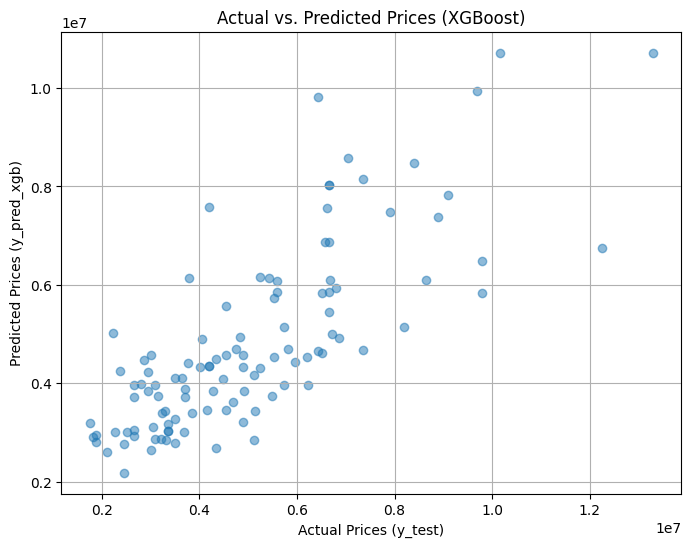

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred_xgb)")
plt.title("Actual vs. Predicted Prices (XGBoost)")
plt.grid(True)
plt.show()

In [5]:
# Apply label encoding to the ordinal categorical column 'furnishingstatus'
# We'll map the categories to numerical values
furnishing_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_mapping)

# Display the first few rows to see the changes
display(df.head())

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,2,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,2,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,1,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,2,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,2,True,True,True,False,True,False


In [3]:
# Display data types
print("Data types:")
display(df.dtypes)

# Display descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())

# Display correlation matrix
print("\nCorrelation matrix:")
display(df.corr(numeric_only=True))

Data types:


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object



Descriptive statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



Correlation matrix:


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000
